<a href="https://colab.research.google.com/github/SAULIZA/nacimientos_defuncion/blob/main/Proyecto_defuncion_nacimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2: Defunción fetal y nacimientos
* Realizado por: Saúl Iza
* Fecha de elaborración: 08/04/2023
* Fecha de modificación: 08/04/2023 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pyreadstat 

## Fuente de datos: 


Los datos fueron adquiridos del banco de datos abiertos del INEC.

## Características de los datos


Los datos que se presentan indican información acerca de defunciones y nacimientos en el Ecuador. Los datos tanto de defunciones como de nacimientos son distintos, pero, ellos comparten algunas características de condiciones exteriores como lugar de nacimiento, establecimiento de atención, y condiciones más internas como por ejemplo la edad de la madre, número de chequeos prepartos, etc. Con estas características podemos hacer un marco de datos en el que se indiquen las características descritas y el fallecimiento o el nacimiento de un niño. 

## Objetivo 

El objetivo de este análisis de datos es que gracias a los datos obtenidos de nacimientos y defunciones fetales de los años 2012 a 2015, podemos investigar variables muy importantes claves que pueden intervenir en el nacimiento o fallecimiento de un ser humanno en el Ecuador. También queremos averiguar si el fallecimiento o no de un nuevo ser humano esta condicionado por su entorno. Considero que este estudio es muy importante a nivel Social. Esperamos tener resultados sorprendentes, o resultados que tal vez sean obvios sin embargo tener resultados cuantificados siempre es bueno a la hora de medir algo tan delicado como el nacimiento o fallecimiento de un nuevo ser humano.

## Adquisición de datos

* Lectura de archivos defunciones

In [ ]:
#Datos defunciones fetales
df1_1 = pd.read_csv("/content/drive/MyDrive/Codificación de Dojo/Proyecto2/defuncion_fetal/EDFetal_2012.dat",sep='\t')

In [ ]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sexo        1717 non-null   int64
 1   sem_gest    1717 non-null   int64
 2   anio_fall   1717 non-null   int64
 3   mes_fall    1717 non-null   int64
 4   asis_por    1717 non-null   int64
 5   p_emb       1717 non-null   int64
 6   lugar_ocur  1717 non-null   int64
 7   prov_fall   1717 non-null   int64
 8   cant_fall   1717 non-null   int64
 9   parr_fall   1717 non-null   int64
 10  area_fall   1717 non-null   int64
 11  edad_mad    1717 non-null   int64
 12  nac_mad     1717 non-null   int64
 13  con_pren    1717 non-null   int64
 14  hij_viv     1717 non-null   int64
 15  hij_vivm    1717 non-null   int64
 16  hij_nacm    1717 non-null   int64
 17  etnia       1717 non-null   int64
 18  est_civil   1717 non-null   int64
 19  sabe_leer   1717 non-null   int64
 20  niv_inst    1717 non-null   in

In [ ]:
# Lee el archivo SAV
df1_2, meta = pyreadstat.read_sav('/content/drive/MyDrive/Codificación de Dojo/Proyecto2/defuncion_fetal/Base_Defunciones_Fetales_2013.sav')

# Convierte el archivo en un objeto de Pandas DataFrame
df1_2 = pd.DataFrame(df1_2)

In [ ]:
# Lee el archivo SAV
df1_3, meta = pyreadstat.read_sav('/content/drive/MyDrive/Codificación de Dojo/Proyecto2/defuncion_fetal/EDF_2014.sav')

# Convierte el archivo en un objeto de Pandas DataFrame
df1_3 = pd.DataFrame(df1_3)

In [ ]:
# Lee el archivo SAV
df1_4, meta = pyreadstat.read_sav('/content/drive/MyDrive/Codificación de Dojo/Proyecto2/defuncion_fetal/EDF_2015.sav')

# Convierte el archivo en un objeto de Pandas DataFrame
df1_4 = pd.DataFrame(df1_4)

* Igualación de nombres de columnas entre archivos de defunciones

In [ ]:
names1 = ["sexo","sem_gest","anio_def","mes_def","asis_por","p_emb","lugar_ocur","prov_fall","cant_fall","parr_fall","area_fall","edad_mad","nac_mad","con_pren","hij_vivos","hij_vivm","hij_nacm","p_etnica","est_civil","sabe_leer","niv_inst","prov_res","cant_res","parr_res","area_res"]
df1_1 = df1_1.loc[:, names1]

In [ ]:
df1_1 = df1_1.rename(columns={"anio_def":"anio_fall","mes_def":"mes_fall","hij_vivos":"hij_viv","p_etnica":"etnia"})

In [ ]:
names2 = ["sexo","sem_gest","anio_fall","mes_fall","asis_por","p_emb","lugar_ocur","prov_fall","cant_fall","parr_fall","area_fall","edad_mad","nac_mad","con_pren","hij_viv","hij_vivm","hij_nacm","etnia","est_civil","sabe_leer","niv_inst","prov_res","cant_res","parr_res","area_res"]
df1_2 = df1_2.loc[:, names2]

In [ ]:
df1_3 = df1_3.loc[:, names2]

In [ ]:
df1_4 = df1_4.loc[:, names2]

* Unión de datos de defunciones

In [ ]:
#Unión de datos de las defunciones fetales
df_defunciones = pd.concat([df1_1, df1_2, df1_3, df1_4])

* Extracción de datos de defunciones

In [ ]:
#Guardamos el data frame de defunciones en un archivo
df_defunciones.to_csv('defuncion.csv', index=False)

* Lectura de datos de nacimientos

In [ ]:
#datos nacimientos
df1_1n = pd.read_csv("/content/drive/MyDrive/Codificación de Dojo/Proyecto2/nacimientos/Base_Nacimientos_2012.dat",sep='\t')

In [ ]:
df1_1n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345151 entries, 0 to 345150
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   sexo        345151 non-null  int64
 1   sem_gest    345151 non-null  int64
 2   anio_nac    345151 non-null  int64
 3   mes_nac     345151 non-null  int64
 4   asis_por    345151 non-null  int64
 5   p_emb       345151 non-null  int64
 6   lugar_ocur  345151 non-null  int64
 7   prov_nac    345151 non-null  int64
 8   cant_nac    345151 non-null  int64
 9   parr_nac    345151 non-null  int64
 10  area_nac    345151 non-null  int64
 11  edad_mad    345151 non-null  int64
 12  nac_mad     345151 non-null  int64
 13  con_pren    345151 non-null  int64
 14  hij_viv     345151 non-null  int64
 15  hij_vivm    345151 non-null  int64
 16  hij_nacm    345151 non-null  int64
 17  etnia       345151 non-null  int64
 18  est_civil   345151 non-null  int64
 19  sabe_leer   345151 non-null  int64
 20  niv_

In [ ]:
# Lee el archivo SAV
df1_2n, meta = pyreadstat.read_sav('/content/drive/MyDrive/Codificación de Dojo/Proyecto2/nacimientos/Base_Nacidos_Vivos_año_2013.sav')

# Convierte el archivo en un objeto de Pandas DataFrame
df1_2n = pd.DataFrame(df1_2n)

In [ ]:
# Lee el archivo SAV
df1_3n, meta = pyreadstat.read_sav('/content/drive/MyDrive/Codificación de Dojo/Proyecto2/nacimientos/ENV_2014.sav')

# Convierte el archivo en un objeto de Pandas DataFrame
df1_3n = pd.DataFrame(df1_3n)

In [ ]:
# Lee el archivo SAV
df1_4n, meta = pyreadstat.read_sav('/content/drive/MyDrive/Codificación de Dojo/Proyecto2/nacimientos/ENV_2015.sav')

# Convierte el archivo en un objeto de Pandas DataFrame
df1_4n = pd.DataFrame(df1_4n)

In [ ]:
df1_4n.head()

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,sexo,anio_nac,mes_nac,...,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res,residente
0,01,0101,010150,2015.0,99.0,99.0,2015/99/99,2.0,2015.0,1.0,...,99.0,9.0,9.0,9.0,9.0,01,0101,010150,1.0,1.0
1,01,0101,010150,2015.0,99.0,99.0,2015/99/99,1.0,2015.0,1.0,...,99.0,9.0,9.0,9.0,9.0,01,0101,010150,1.0,1.0
2,01,0101,010150,2015.0,99.0,99.0,2015/99/99,2.0,2015.0,1.0,...,99.0,9.0,9.0,9.0,9.0,01,0101,010150,1.0,1.0
3,01,0101,010150,2015.0,99.0,99.0,2015/99/99,2.0,2015.0,1.0,...,99.0,9.0,9.0,9.0,9.0,01,0101,010150,1.0,1.0
4,01,0101,010150,2015.0,99.0,99.0,2015/99/99,2.0,2015.0,1.0,...,99.0,9.0,9.0,9.0,9.0,01,0101,010150,1.0,1.0


* Igualación de nombres de columnas de datos de nacimientos

In [ ]:
names_n1 = ["sexo","sem_gest","anio_nac","mes_nac","asis_por","p_emb","lugar_ocur","prov_nac","cant_nac","parr_nac","area_nac","edad_mad","nac_mad","con_pren","hij_vivos","hij_vivm","hij_nacm","p_etnica","est_civil","sabe_leer","niv_inst","prov_res","cant_res","parr_res","area_res"]
df1_1n = df1_1n.loc[:, names_n1]

In [ ]:
df1_1n = df1_1n.rename(columns={"hij_vivos":"hij_viv","p_etnica":"etnia"})

In [ ]:
names_n2 = ["sexo","sem_gest","anio_nac","mes_nac","asis_por","p_emb","lugar_ocur","prov_nac","cant_nac","parr_nac","area_nac","edad_mad","nac_mad","con_pren","hij_viv","hij_vivm","hij_nacm","etnia","est_civil","sabe_leer","niv_inst","prov_res","cant_res","parr_res","area_res"]
df1_2n = df1_2n.loc[:, names_n2]

In [ ]:
df1_3n = df1_3n.loc[:, names_n2]

In [ ]:
df1_4n = df1_4n.loc[:, names_n2]

* Unión de datos de nacimientos

In [ ]:
#Unión de datos de nacimientos
df_nacimientos = pd.concat([df1_1n, df1_2n, df1_3n, df1_4n])

* Extracción de datos de nacimientos

In [ ]:
#Guardamos el data frame de defunciones en un archivo
df_nacimientos.to_csv('nacimientos.csv', index=False)

* Igualación de nombres de columnas de datos de defunciones y nacimientos

In [ ]:
#primero vamos a renombrar las columnas de los datos de nacimiento
renam_nac = {"anio_nac":"anio","mes_nac":"mes","prov_nac":"provincia","cant_nac":"canton","parr_nac":"parroquia","area_nac":"area"}
df_nacimientos = df_nacimientos.rename(columns=renam_nac)

In [ ]:
df_nacimientos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339556 entries, 0 to 351010
Data columns (total 25 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   sexo        1339556 non-null  float64
 1   sem_gest    1307015 non-null  float64
 2   anio        1339556 non-null  float64
 3   mes         1339556 non-null  float64
 4   asis_por    1265330 non-null  float64
 5   p_emb       1265330 non-null  float64
 6   lugar_ocur  1265330 non-null  float64
 7   provincia   1339556 non-null  object 
 8   canton      1339556 non-null  object 
 9   parroquia   1339556 non-null  object 
 10  area        1265330 non-null  float64
 11  edad_mad    1265330 non-null  float64
 12  nac_mad     1265330 non-null  float64
 13  con_pren    1265330 non-null  float64
 14  hij_viv     1265330 non-null  float64
 15  hij_vivm    1265330 non-null  float64
 16  hij_nacm    1265330 non-null  float64
 17  etnia       1265330 non-null  float64
 18  est_civil   1265330 non

Las columnas escogidas en este paso, son las columnas que consideramos valiosas para el propósito

In [ ]:
#renombramos las columnas de los datos de defunciones
renam_def = {"anio_fall":"anio","mes_fall":"mes","prov_fall":"provincia","cant_fall":"canton","parr_fall":"parroquia","area_fall":"area"}
df_defunciones = df_defunciones.rename(columns=renam_def)

In [ ]:
df_defunciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6846 entries, 0 to 1856
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sexo        6846 non-null   float64
 1   sem_gest    6846 non-null   float64
 2   anio        6846 non-null   float64
 3   mes         6846 non-null   float64
 4   asis_por    6846 non-null   float64
 5   p_emb       6846 non-null   float64
 6   lugar_ocur  6846 non-null   float64
 7   provincia   6846 non-null   object 
 8   canton      6846 non-null   object 
 9   parroquia   6846 non-null   object 
 10  area        6846 non-null   float64
 11  edad_mad    6846 non-null   float64
 12  nac_mad     6846 non-null   float64
 13  con_pren    6846 non-null   float64
 14  hij_viv     6846 non-null   float64
 15  hij_vivm    6846 non-null   float64
 16  hij_nacm    6846 non-null   float64
 17  etnia       6846 non-null   float64
 18  est_civil   6846 non-null   float64
 19  sabe_leer   6846 non-null  

In [ ]:
# generamos nuevos data frame
df_nac = df_nacimientos
df_def = df_defunciones

## Preparación de datos

Rellenamos los espacios vacios con 0, en las celdas de provincias, cantones y parroquias. Luego cambiamos las mismas columnas que son de tipo object a tipo flotante. Luego reemplazamos los codigos por sus respectivos nombres.

### Reemplazo de codigos a provincias, cantones y parroquias

In [ ]:
df_nac["provincia"] = df_nac["provincia"].replace("",0)

In [ ]:
df_nac["provincia"] = df_nac["provincia"].astype(float) 

In [ ]:
df_nac["canton"] = df_nac["canton"].replace("",0)

In [ ]:
df_nac["canton"] = df_nac["canton"].astype(float) 

In [ ]:
df_nac["parroquia"] = df_nac["parroquia"].replace("",0)

In [ ]:
df_nac["parroquia"] = df_nac["parroquia"].astype(float) 

In [ ]:
df_nac["prov_res"] = df_nac["prov_res"].astype(float) 

In [ ]:
df_nac["cant_res"] = df_nac["cant_res"].astype(float)

In [ ]:
df_nac["parr_res"] = df_nac["parr_res"].astype(float)

In [ ]:
df_def["provincia"] = df_def["provincia"].astype(float) 

In [ ]:
df_def["canton"] = df_def["canton"].astype(float) 

In [ ]:
df_def["parroquia"] = df_def["parroquia"].astype(float) 

In [ ]:
df_def["prov_res"] = df_def["prov_res"].astype(float) 

In [ ]:
df_def["cant_res"] = df_def["cant_res"].astype(float) 

In [ ]:
df_def["parr_res"] = df_def["parr_res"].astype(float) 

Reemplazo de códigos por características reales

In [ ]:
provi = pd.read_excel("/content/drive/MyDrive/Codificación de Dojo/Proyecto2/provincia.xlsx", index_col=False)

In [ ]:
provi = provi.set_index("codigo")
dicc_prov = provi.to_dict()['provincia']

In [ ]:
canto = pd.read_excel("/content/drive/MyDrive/Codificación de Dojo/Proyecto2/canton.xlsx")

In [ ]:
canto = canto.set_index("codigo")
dicc_canto = canto.to_dict()['canton']

In [ ]:
parro = pd.read_excel("/content/drive/MyDrive/Codificación de Dojo/Proyecto2/parroquia.xlsx")

In [ ]:
parro = parro.set_index("codigo")
dicc_parro = parro.to_dict()['parroquia']

In [ ]:
df_nac["provincia"] = df_nac["provincia"].replace(dicc_prov)
df_nac["prov_res"] = df_nac["prov_res"].replace(dicc_prov)
df_def["provincia"] = df_def["provincia"].replace(dicc_prov)
df_def["prov_res"] = df_def["prov_res"].replace(dicc_prov)

In [ ]:
df_nac["canton"] = df_nac["canton"].replace(dicc_canto)
df_nac["cant_res"] = df_nac["cant_res"].replace(dicc_canto)
df_def["canton"] = df_def["canton"].replace(dicc_canto)
df_def["cant_res"] = df_def["cant_res"].replace(dicc_canto)

In [ ]:
df_nac["parroquia"] = df_nac["parroquia"].replace(dicc_parro)
df_nac["parr_res"] = df_nac["parr_res"].replace(dicc_parro)
df_def["parroquia"] = df_def["parroquia"].replace(dicc_parro)
df_def["parr_res"] = df_def["parr_res"].replace(dicc_parro)

### Reemplazo de sexo y mes

In [ ]:
df_nac["sexo"] = df_nac["sexo"].replace({1:"Hombre",2:"Mujer"})
df_def["sexo"] = df_def["sexo"].replace({1:"Hombre",2:"Mujer"})

In [ ]:
meses = {1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",5:"Mayo",6:"Junio",7:"Julio",8:"Agosto",9:"Septiembre",10:"Octubre",11:"Noviembre",12:"Diciembre"}
df_nac["mes"] = df_nac["mes"].replace(meses)
df_def["mes"] = df_def["mes"].replace(meses)

### Reemplazo de asistido por, producto de embarazo y lugar de ocurrencia

In [ ]:
asistencia = {1:"Medico",2:"Obstetra",3:"Enfermero_a",4:"Auxiliar_enfermeria",5:"Partero_a_calificad",6:"Partero_a_no_calificado",7:"Otro",9:"Ignorado"}
df_nac["asis_por"] = df_nac["asis_por"].replace(asistencia)
df_def["asis_por"] = df_def["asis_por"].replace(asistencia)

In [ ]:
prod_embar = {1:"Simple", 2:"Doble",3:"Triple",4:"Cuadruple_o_mas"}
df_nac["p_emb"] = df_nac["p_emb"].replace(prod_embar)
df_def["p_emb"] = df_def["p_emb"].replace(prod_embar)

In [ ]:
lug_oc = {1:"Establecimiento_ministerio_de_salud",2:"Establecimiento_IESS",3:"Establecimiento_junta_beneficiaria",4:"Otro_establecimiento_publico",5:"Hospital_clinica_consultorio_privado",6:"Casa",7:"Otro"}
df_nac["lugar_ocur"] = df_nac["lugar_ocur"].replace(lug_oc)
df_def["lugar_ocur"] = df_def["lugar_ocur"].replace(lug_oc)

### Reemplazo de area,nacionalidad de la madre, etnia, estado civil, sabe leer y nivel de instrucción 

In [ ]:
df_nac["area"] = df_nac["area"].replace({1:"Urbana",2:"Rural"})
df_def["area"] = df_def["area"].replace({1:"Urbana",2:"Rural"})
df_nac["area_res"] = df_nac["area_res"].replace({1:"Urbana",2:"Rural"})
df_def["area_res"] = df_def["area_res"].replace({1:"Urbana",2:"Rural"})

In [ ]:
df_nac["nac_mad"] = df_nac["nac_mad"].replace({1:"Ecuatoriana",2:"Extranjera",9:"Ignorado"})
df_def["nac_mad"] = df_def["nac_mad"].replace({1:"Ecuatoriana",2:"Extranjera",9:"Ignorado"})

In [ ]:
df_nac["etnia"] = df_nac["etnia"].replace({1:"Indigena",2:"Afro_ecuatoriana",3:"Negra",4:"Mulata",5:"Montubia",6:"Mestiza",7:"Blanca",8:"Otra",9:"Ignorado"})
df_def["etnia"] = df_def["etnia"].replace({1:"Indigena",2:"Afro_ecuatoriana",3:"Negra",4:"Mulata",5:"Montubia",6:"Mestiza",7:"Blanca",8:"Otra",9:"Ignorado"})

In [ ]:
df_nac["est_civil"] = df_nac["est_civil"].replace({1:"Unida",2:"Soltera",3:"Casada",4:"Divorciada",5:"Separada",6:"Viuda",9:"Se ignora"})
df_def["est_civil"] = df_def["est_civil"].replace({1:"Unida",2:"Soltera",3:"Casada",4:"Divorciada",5:"Separada",6:"Viuda",9:"Se ignora"})

In [ ]:
df_nac["sabe_leer"] = df_nac["sabe_leer"].replace({1:"Si",2:"No",9:"Ignorado"})
df_def["sabe_leer"] = df_def["sabe_leer"].replace({1:"Si",2:"No",9:"Ignorado"})

In [ ]:
df_nac["niv_inst"] = df_nac["niv_inst"].replace({0:"Ninguno",1:"Centro_de_alfabetizacion",2:"Primaria",3:"Secundaria",4:"Educacion_basica",5:"Educacion_media",6:"Ciclo_post_bachillerato",7:"Superior",8:"Postgrado",9:"Se_ignora"})
df_def["niv_inst"] = df_def["niv_inst"].replace({0:"Ninguno",1:"Centro_de_alfabetizacion",2:"Primaria",3:"Secundaria",4:"Educacion_basica",5:"Educacion_media",6:"Ciclo_post_bachillerato",7:"Superior",8:"Postgrado",9:"Se_ignora"})

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df_nac.head()

,sexo,sem_gest,anio,mes,asis_por,p_emb,lugar_ocur,provincia,canton,parroquia,area,edad_mad,nac_mad,con_pren,hij_viv,hij_vivm,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res
0,Mujer,99.0,2011.0,Octubre,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,30.0,Ecuatoriana,99.0,2.0,99.0,99.0,Mestiza,Soltera,Si,Primaria,Azuay,Cuenca,Cuenca,Urbana
1,Hombre,39.0,2011.0,Marzo,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,19.0,Ecuatoriana,99.0,2.0,99.0,99.0,Mestiza,Soltera,Si,Secundaria,Azuay,Cuenca,Cuenca,Urbana
2,Mujer,33.0,2011.0,Diciembre,Medico,Simple,Otro_establecimiento_publico,Azuay,Cuenca,Cuenca,Urbana,33.0,Ecuatoriana,99.0,1.0,99.0,99.0,Mestiza,Soltera,Si,Superior,Azuay,Cuenca,Cuenca,Urbana
3,Hombre,40.0,2011.0,Septiembre,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,31.0,Ecuatoriana,99.0,6.0,99.0,99.0,Mestiza,Casada,Si,Secundaria,Azuay,Cuenca,Cuenca,Urbana
4,Mujer,99.0,2011.0,Octubre,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,19.0,Ecuatoriana,99.0,2.0,99.0,1.0,Mestiza,Unida,Si,Secundaria,Azuay,Cuenca,Cuenca,Urbana


In [ ]:
df_def.head()

,sexo,sem_gest,anio,mes,asis_por,p_emb,lugar_ocur,provincia,canton,parroquia,area,edad_mad,nac_mad,con_pren,hij_viv,hij_vivm,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res
0,Mujer,36.0,2012.0,Septiembre,Medico,Simple,Casa,Azuay,Gualaceo,Gualaceo,Urbana,14.0,Ecuatoriana,3.0,0.0,0.0,1.0,Indigena,Unida,Si,Primaria,Azuay,Chordeleg,La Union,Rural
1,Mujer,38.0,2012.0,Diciembre,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,24.0,Ecuatoriana,2.0,3.0,1.0,6.0,Indigena,Unida,No,Se_ignora,Azuay,Cuenca,Cuenca,Urbana
2,Mujer,33.0,2012.0,Octubre,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,31.0,Ecuatoriana,8.0,3.0,0.0,1.0,Mestiza,Casada,Si,Secundaria,Azuay,Gualaceo,Gualaceo,Urbana
3,Mujer,30.0,2012.0,Mayo,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,33.0,Ecuatoriana,0.0,0.0,0.0,1.0,Mestiza,Unida,Si,Primaria,Azuay,Cuenca,Cuenca,Urbana
4,Mujer,34.0,2012.0,Junio,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,23.0,Ecuatoriana,8.0,2.0,0.0,1.0,Mestiza,Unida,Si,Primaria,Azuay,Cuenca,Cuenca,Urbana


## Unión de ambos datos

In [ ]:
#antes de unirlos debemos aumentar una columna en el que debe constar el estado del ser vivo: vivo=1, defunción=0  
df_nac = df_nac.assign(Estado=[1]*len(df_nac))
df_def = df_def.assign(Estado=[0]*len(df_def))

In [ ]:
#Unimos ambos conjuntos de datos
df = pd.concat([df_nac, df_def])

In [ ]:
df.head()

,sexo,sem_gest,anio,mes,asis_por,p_emb,lugar_ocur,provincia,canton,parroquia,area,edad_mad,nac_mad,con_pren,hij_viv,hij_vivm,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res,Estado
0,Mujer,99.0,2011.0,Octubre,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,30.0,Ecuatoriana,99.0,2.0,99.0,99.0,Mestiza,Soltera,Si,Primaria,Azuay,Cuenca,Cuenca,Urbana,1
1,Hombre,39.0,2011.0,Marzo,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,19.0,Ecuatoriana,99.0,2.0,99.0,99.0,Mestiza,Soltera,Si,Secundaria,Azuay,Cuenca,Cuenca,Urbana,1
2,Mujer,33.0,2011.0,Diciembre,Medico,Simple,Otro_establecimiento_publico,Azuay,Cuenca,Cuenca,Urbana,33.0,Ecuatoriana,99.0,1.0,99.0,99.0,Mestiza,Soltera,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
3,Hombre,40.0,2011.0,Septiembre,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,31.0,Ecuatoriana,99.0,6.0,99.0,99.0,Mestiza,Casada,Si,Secundaria,Azuay,Cuenca,Cuenca,Urbana,1
4,Mujer,99.0,2011.0,Octubre,Medico,Simple,Establecimiento_ministerio_de_salud,Azuay,Cuenca,Cuenca,Urbana,19.0,Ecuatoriana,99.0,2.0,99.0,1.0,Mestiza,Unida,Si,Secundaria,Azuay,Cuenca,Cuenca,Urbana,1


In [ ]:
#Guardamos el data frame con el que vamos a trabajar
df.to_csv('defuncion_nacimientos.csv', index=False)

## Limpieza de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346402 entries, 0 to 1856
Data columns (total 26 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   sexo        1346402 non-null  object 
 1   sem_gest    1313861 non-null  float64
 2   anio        1346402 non-null  float64
 3   mes         1346402 non-null  object 
 4   asis_por    1272176 non-null  object 
 5   p_emb       1272176 non-null  object 
 6   lugar_ocur  1272176 non-null  object 
 7   provincia   1346402 non-null  object 
 8   canton      1346402 non-null  object 
 9   parroquia   1346402 non-null  object 
 10  area        1272176 non-null  object 
 11  edad_mad    1272176 non-null  float64
 12  nac_mad     1272176 non-null  object 
 13  con_pren    1272176 non-null  float64
 14  hij_viv     1272176 non-null  float64
 15  hij_vivm    1272176 non-null  float64
 16  hij_nacm    1272176 non-null  float64
 17  etnia       1272176 non-null  object 
 18  est_civil   1272176 non-n

In [ ]:
df.isna().sum()

sexo              0
sem_gest      32541
anio              0
mes               0
asis_por      74226
p_emb         74226
lugar_ocur    74226
provincia         0
canton            0
parroquia         0
area          74226
edad_mad      74226
nac_mad       74226
con_pren      74226
hij_viv       74226
hij_vivm      74226
hij_nacm      74226
etnia         74226
est_civil     74226
sabe_leer     74226
niv_inst      78019
prov_res          0
cant_res          0
parr_res          0
area_res          0
Estado            0
dtype: int64

### 1) Variables categóricas

Tenemos algunas celdas vacías en las siguientes columnas, vamos a analizar cada una de ellas



In [ ]:
df["sexo"].value_counts()

Hombre    689476
Mujer     656912
3.0           14
Name: sexo, dtype: int64

Hay un codigo en sexo que vale 3, debido a que no se sabe que significa este número en el diccionario de los datos y debido a la pequeña cantidad de estos, los vamos a eliminar.

In [ ]:
df = df.loc[df["sexo"] != 3,:]

In [ ]:
df["sexo"].value_counts()

Hombre    689476
Mujer     656912
Name: sexo, dtype: int64

In [ ]:
df["mes"].value_counts()

Diciembre     119864
Octubre       115768
Mayo          115527
Septiembre    115379
Julio         115308
Agosto        115228
Marzo         111834
Noviembre     111468
Junio         110513
Abril         110131
Enero         106032
Febrero        99336
Name: mes, dtype: int64

La columna mes no tiene ningun problema

In [ ]:
df["asis_por"].value_counts()

Medico                     989304
Obstetra                   150513
Otro                        58981
Ignorado                    38588
Partero_a_no_calificado     29590
Partero_a_calificad          4111
Auxiliar_enfermeria           600
Enfermero_a                   475
Name: asis_por, dtype: int64

In [ ]:
df.loc[df["asis_por"].isna(),:]

,sexo,sem_gest,anio,mes,asis_por,p_emb,lugar_ocur,provincia,canton,parroquia,area,edad_mad,nac_mad,con_pren,hij_viv,hij_vivm,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res,Estado
282968,Mujer,40.0,2010.0,Octubre,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canar,Canar,Canar,Urbana,1
282969,Hombre,99.0,2010.0,Marzo,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azuay,Cuenca,Sayausi,Rural,1
282970,Mujer,39.0,2011.0,Noviembre,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azuay,Cuenca,10105.0,Urbana,1
282971,Hombre,38.0,2011.0,Noviembre,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azuay,Cuenca,10110.0,Urbana,1
282972,Hombre,38.0,2011.0,Octubre,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azuay,Cuenca,Cuenca,Urbana,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304377,Hombre,NaN,2012.0,Julio,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manabi,Manta,130801.0,Urbana,1
304378,Hombre,NaN,2012.0,Septiembre,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Rios,Baba,Baba,Urbana,1
304379,Hombre,NaN,2011.0,Abril,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Rios,Baba,Baba,Urbana,1
304380,Mujer,NaN,2006.0,Noviembre,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manabi,Montecristi,Montecristi,Urbana,1


In [ ]:
df.loc[df["asis_por"].isna(),:]["Estado"].value_counts()

1    74226
Name: Estado, dtype: int64

La columna asistido por no tiene problemas, pero contiene mucho datos vacíos según el .isna aplicado anteriormente. Además vemos que casi toda la columna tiene datos vacios en muchas columnas, todas estas filas, pertenecen al grupo de nacidos. Debido a la cantidad de columnas vacías lo vamos a eliminar

In [ ]:
# eliminamos las filas en las que la columna asis no contiene datos
df = df.dropna(subset=["asis_por"])

In [ ]:
# con esto, veamos como queda nuestro data frame
df.isna().sum()

sexo             0
sem_gest         0
anio             0
mes              0
asis_por         0
p_emb            0
lugar_ocur       0
provincia        0
canton           0
parroquia        0
area             0
edad_mad         0
nac_mad          0
con_pren         0
hij_viv          0
hij_vivm         0
hij_nacm         0
etnia            0
est_civil        0
sabe_leer        0
niv_inst      3793
prov_res         0
cant_res         0
parr_res         0
area_res         0
Estado           0
dtype: int64

In [ ]:
df["p_emb"].value_counts()

Simple             1216267
9.0                  38588
Doble                16534
Triple                 586
Cuadruple_o_mas        187
Name: p_emb, dtype: int64

la columna p_emb, no tiene ningun inconveniente

In [ ]:
df["lugar_ocur"].value_counts()

Establecimiento_ministerio_de_salud     597507
Hospital_clinica_consultorio_privado    319630
Establecimiento_junta_beneficiaria       99237
Casa                                     95622
Establecimiento_IESS                     76970
9.0                                      38588
Otro_establecimiento_publico             33540
Otro                                     11068
Name: lugar_ocur, dtype: int64

In [ ]:
df["provincia"].value_counts()

Guayas                             317564
Pichincha                          206382
Manabi                             101518
Los Rios                            67357
Azuay                               62113
El Oro                              52617
Esmeraldas                          44375
Santo Domingo de los Tsachilas      43439
Tungurahua                          40552
0.0                                 38588
Loja                                37001
Imbabura                            36079
Chimborazo                          35332
Cotopaxi                            33271
Santa Elena                         27913
Sucumbios                           19328
Morona Santiago                     18667
Canar                               17484
Orellana                            16399
Bolivar                             12685
Napo                                12325
Carchi                              11510
Pastaza                             10155
Zamora Chinchipe                  

In [ ]:
df["canton"].value_counts()

Guayaquil         250477
Quito             188823
Cuenca             50877
Santo Domingo      41383
0.0                38588
                   ...  
Cevallos              15
Tisaleo               12
Atahualpa              8
El Pan                 8
Guachapala             4
Name: canton, Length: 224, dtype: int64

In [ ]:
df["parroquia"].value_counts()

Guayaquil                          225250
Quito                              150621
Cuenca                              43896
0.0                                 38588
Santo Domingo de los Colorados      35177
                                    ...  
El Chorro                               1
Saracay                                 1
Marcos Espinel (Chacata)                1
30104.0                                 1
Panguintza                              1
Name: parroquia, Length: 1167, dtype: int64

Se puede ver que todas las columnas revisadas, provincia, canton, y parroquia contienen un 0 en la data, asi como en el de lugar de ocurrencia. veamo como estám relacionados estos.

In [ ]:
df.loc[df["lugar_ocur"]==9,:]

,sexo,sem_gest,anio,mes,asis_por,p_emb,lugar_ocur,provincia,canton,parroquia,area,edad_mad,nac_mad,con_pren,hij_viv,hij_vivm,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res,Estado
16,Mujer,99.0,2009.0,Abril,Ignorado,9.0,9.0,0.0,0.0,0.0,9.0,99.0,Ignorado,0.0,1.0,0.0,0.0,Ignorado,Se ignora,Ignorado,Se_ignora,Azuay,Cuenca,Cuenca,Urbana,1
22,Hombre,38.0,2009.0,Octubre,Ignorado,9.0,9.0,0.0,0.0,0.0,9.0,99.0,Ignorado,0.0,1.0,0.0,0.0,Ignorado,Se ignora,Ignorado,Se_ignora,Azuay,Cuenca,Sayausi,Rural,1
23,Hombre,40.0,2010.0,Noviembre,Ignorado,9.0,9.0,0.0,0.0,0.0,9.0,99.0,Ignorado,0.0,1.0,0.0,0.0,Ignorado,Se ignora,Ignorado,Se_ignora,Azuay,Cuenca,Cuenca,Urbana,1
42,Mujer,40.0,2008.0,Diciembre,Ignorado,9.0,9.0,0.0,0.0,0.0,9.0,99.0,Ignorado,0.0,1.0,0.0,0.0,Ignorado,Se ignora,Ignorado,Se_ignora,Azuay,Cuenca,Cuenca,Urbana,1
60,Mujer,99.0,2009.0,Septiembre,Ignorado,9.0,9.0,0.0,0.0,0.0,9.0,99.0,Ignorado,0.0,1.0,0.0,0.0,Ignorado,Se ignora,Ignorado,Se_ignora,Azuay,Cuenca,Cuenca,Urbana,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345108,Mujer,99.0,2010.0,Octubre,Ignorado,9.0,9.0,0.0,0.0,0.0,9.0,99.0,Ignorado,0.0,1.0,0.0,0.0,Ignorado,Se ignora,Ignorado,Se_ignora,Santa Elena,La Libertad,La Libertad,Urbana,1
345111,Mujer,99.0,2010.0,Octubre,Ignorado,9.0,9.0,0.0,0.0,0.0,9.0,99.0,Ignorado,0.0,1.0,0.0,0.0,Ignorado,Se ignora,Ignorado,Se_ignora,Santa Elena,Santa Elena,Santa Elena,Urbana,1
345121,Mujer,39.0,2009.0,Septiembre,Ignorado,9.0,9.0,0.0,0.0,0.0,9.0,99.0,Ignorado,0.0,1.0,0.0,0.0,Ignorado,Se ignora,Ignorado,Se_ignora,Santa Elena,La Libertad,La Libertad,Urbana,1
345138,Mujer,99.0,2010.0,Noviembre,Ignorado,9.0,9.0,0.0,0.0,0.0,9.0,99.0,Ignorado,0.0,1.0,0.0,0.0,Ignorado,Se ignora,Ignorado,Se_ignora,Santa Elena,Salinas,Anconcito,Rural,1


Se puede ver que, justamente todas estas columnas estan correlacionadas, no contienen datos coherentes. debido a q representan un 3 % de la data los vamos a eliminar.

In [ ]:
df = df.loc[df["lugar_ocur"] != 9,:]

In [ ]:
#verificamos
df["lugar_ocur"].value_counts()

Establecimiento_ministerio_de_salud     597507
Hospital_clinica_consultorio_privado    319630
Establecimiento_junta_beneficiaria       99237
Casa                                     95622
Establecimiento_IESS                     76970
Otro_establecimiento_publico             33540
Otro                                     11068
Name: lugar_ocur, dtype: int64

In [ ]:
#veamos como va quedando nuestro data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233574 entries, 0 to 1856
Data columns (total 26 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   sexo        1233574 non-null  object 
 1   sem_gest    1233574 non-null  float64
 2   anio        1233574 non-null  float64
 3   mes         1233574 non-null  object 
 4   asis_por    1233574 non-null  object 
 5   p_emb       1233574 non-null  object 
 6   lugar_ocur  1233574 non-null  object 
 7   provincia   1233574 non-null  object 
 8   canton      1233574 non-null  object 
 9   parroquia   1233574 non-null  object 
 10  area        1233574 non-null  object 
 11  edad_mad    1233574 non-null  float64
 12  nac_mad     1233574 non-null  object 
 13  con_pren    1233574 non-null  float64
 14  hij_viv     1233574 non-null  float64
 15  hij_vivm    1233574 non-null  float64
 16  hij_nacm    1233574 non-null  float64
 17  etnia       1233574 non-null  object 
 18  est_civil   1233574 non-n

Se puede ve que no hay datos faltantes

In [ ]:
df["area"].value_counts()

Urbana    1151182
Rural       82392
Name: area, dtype: int64

la columna de area no tiene variables extrañas

In [ ]:
df["nac_mad"].value_counts()

Ecuatoriana    1148335
Ignorado         70107
Extranjera       15132
Name: nac_mad, dtype: int64

la columna de nacinoalidad de la madre tampoco contiene variables extrañas


In [ ]:
df["etnia"].value_counts()

Mestiza             1021299
Indigena              92753
Ignorado              53840
Blanca                16766
Afro_ecuatoriana      13572
Negra                 12470
Mulata                 9671
Montubia               7035
Otra                   6168
Name: etnia, dtype: int64

La columna de etnia tampoco tiene variables extrañas

In [ ]:
df["est_civil"].value_counts()

Unida         511800
Casada        393077
Soltera       249511
Se ignora      61967
Divorciada      9190
Separada        3565
7.0             2391
Viuda           2073
Name: est_civil, dtype: int64

La columna de estado civil contiene una variable de 7, esta variables es extraña asi que lo podemos añadir al grupo de se ignora

In [ ]:
df["est_civil"] = df["est_civil"].replace(7,"Se ignora")

In [ ]:
df["est_civil"].value_counts()

Unida         511800
Casada        393077
Soltera       249511
Se ignora      64358
Divorciada      9190
Separada        3565
Viuda           2073
Name: est_civil, dtype: int64

In [ ]:
df["sabe_leer"].value_counts()

Si          1183201
Ignorado      34150
No            16223
Name: sabe_leer, dtype: int64

In [ ]:
df["niv_inst"].value_counts()

Secundaria                  411910
Primaria                    339944
Superior                    188338
Educacion_media              90681
Se_ignora                    89864
Educacion_basica             69741
Ciclo_post_bachillerato      20218
Ninguno                      10563
Centro_de_alfabetizacion      4910
Postgrado                     3612
Name: niv_inst, dtype: int64

Las columnas de estado civil, sabe leer y nivel de instruccion no tienen inconvenientes.

### Variables numéricas

In [ ]:
df.describe()

,sem_gest,anio,edad_mad,con_pren,hij_viv,hij_vivm,hij_nacm,Estado
count,1.233574e+06,1.233574e+06,1.233574e+06,1.233574e+06,1.233574e+06,1.233574e+06,1.233574e+06,1.233574e+06
mean,4.691960e+01,2.013209e+03,2.637851e+01,2.568914e+01,2.212121e+00,2.750035e+01,2.738531e+01,9.944616e-01
std,2.097549e+01,2.349776e+00,1.003603e+01,3.757725e+01,2.876801e+00,4.430139e+01,4.423618e+01,7.421394e-02
min,1.200000e+01,1.900000e+03,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.800000e+01,2.012000e+03,2.000000e+01,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.900000e+01,2.013000e+03,2.500000e+01,8.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,4.000000e+01,2.014000e+03,3.100000e+01,1.000000e+01,3.000000e+00,9.900000e+01,9.900000e+01,1.000000e+00
max,9.900000e+01,2.015000e+03,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,1.000000e+00


Se puede observar que en semana de gestación hay un máximo de 99, eso es incoherente, lo vamos a eliminar

In [ ]:
df = df.loc[df["sem_gest"] != 99,:]

In [ ]:
df["sem_gest"].describe()

count    1.062436e+06
mean     3.853045e+01
std      1.885100e+00
min      1.200000e+01
25%      3.800000e+01
50%      3.900000e+01
75%      4.000000e+01
max      4.200000e+01
Name: sem_gest, dtype: float64

Ahora las semanas de gestación máxima es de 43 lo cual es razonable.

In [ ]:
df["anio"].describe()

count    1.062436e+06
mean     2.013371e+03
std      1.312074e+00
min      1.920000e+03
25%      2.012000e+03
50%      2.013000e+03
75%      2.014000e+03
max      2.015000e+03
Name: anio, dtype: float64

La columna de año también tiene rangos raros, se supone que los datos obtenidos son desde el año 2012 hasta el año 2015. 

* Revisemos los datos de defunción

In [ ]:
df1_1["anio_fall"].value_counts()

2012    1717
Name: anio_fall, dtype: int64

In [ ]:
df1_2["anio_fall"].value_counts()

2013.0    1643
Name: anio_fall, dtype: int64

In [ ]:
df1_3["anio_fall"].value_counts()

2014.0    1613
2013.0      16
Name: anio_fall, dtype: int64

In [ ]:
df1_4["anio_fall"].value_counts()

2015.0    1829
2014.0      24
2009.0       2
2013.0       1
2011.0       1
Name: anio_fall, dtype: int64

* Revisemos los datos de nacimientos

In [ ]:
df1_1n["anio_nac"].value_counts()

2012    235237
2011     71326
2010     12779
2009      7387
2008      4850
         ...  
1969        10
1919         8
1913         7
1915         7
1916         6
Name: anio_nac, Length: 101, dtype: int64

In [ ]:
df1_2n["anio_nac"].value_counts()

2013.0    220896
2012.0     62072
2011.0     14316
2010.0      7855
2009.0      5807
           ...  
1919.0         6
1915.0         6
1916.0         4
1914.0         3
1913.0         2
Name: anio_nac, Length: 102, dtype: int64

In [ ]:
df1_3n["anio_nac"].value_counts()

2014.0    229476
2013.0     56724
2012.0     11073
2011.0      6579
2010.0      4416
           ...  
1915.0         1
1912.0         1
1909.0         1
1907.0         1
1916.0         1
Name: anio_nac, Length: 109, dtype: int64

In [ ]:
df1_3n["anio_nac"].value_counts()

2014.0    229476
2013.0     56724
2012.0     11073
2011.0      6579
2010.0      4416
           ...  
1915.0         1
1912.0         1
1909.0         1
1907.0         1
1916.0         1
Name: anio_nac, Length: 109, dtype: int64

Al parecer el problema con los años en el que se registró el nacimiento solo los tiene los datos de nacimientos. para evitar confuciones, vamos a eliminar cualquier registro por debajo del año 2011 

In [ ]:
df = df.loc[df["anio"] > 2011,:]

In [ ]:
# vamos a confirmar 
df["anio"].value_counts()

2015.0    256316
2014.0    254668
2013.0    249842
2012.0    243905
Name: anio, dtype: int64

In [ ]:
df["edad_mad"].describe()

count    1.004731e+06
mean     2.603030e+01
std      8.465152e+00
min      1.100000e+01
25%      2.000000e+01
50%      2.500000e+01
75%      3.000000e+01
max      9.900000e+01
Name: edad_mad, dtype: float64

Dentro de la edad de la madre hay una edad incoherente de 99, también vamos a eliminarlo

In [ ]:
df = df.loc[df["edad_mad"] != 99,:]

In [ ]:
df["edad_mad"].describe()

count    999590.000000
mean         25.655005
std           6.670951
min          11.000000
25%          20.000000
50%          25.000000
75%          30.000000
max          49.000000
Name: edad_mad, dtype: float64

Ahora, la edad máxima es de 49, lo cual es más razonable

In [ ]:
df["con_pren"].describe()

count    999590.000000
mean         20.631714
std          33.034136
min           0.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          99.000000
Name: con_pren, dtype: float64

Dentro de control prenatal hay un valor de 99, ahondemos un poco mas en esta columna

In [ ]:
df.loc[df["con_pren"]>80,:]

,sexo,sem_gest,anio,mes,asis_por,p_emb,lugar_ocur,provincia,canton,parroquia,area,edad_mad,nac_mad,con_pren,hij_viv,hij_vivm,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res,Estado
27,Mujer,39.0,2012.0,Enero,Medico,Simple,Establecimiento_IESS,Azuay,Cuenca,Cuenca,Urbana,33.0,Ecuatoriana,99.0,1.0,99.0,99.0,Mestiza,Soltera,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
75,Hombre,40.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,25.0,Ecuatoriana,99.0,1.0,99.0,99.0,Mestiza,Casada,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
118,Hombre,39.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,32.0,Ecuatoriana,99.0,2.0,99.0,99.0,Mestiza,Casada,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
119,Mujer,41.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,26.0,Ecuatoriana,99.0,1.0,99.0,99.0,Mestiza,Se ignora,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
136,Hombre,38.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,33.0,Ecuatoriana,99.0,3.0,99.0,99.0,Mestiza,Casada,Si,Superior,Canar,Azoques,Azogues,Urbana,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,Hombre,37.0,2015.0,Octubre,Medico,Simple,Establecimiento_ministerio_de_salud,Santa Elena,Santa Elena,Santa Elena,Urbana,14.0,Ecuatoriana,99.0,0.0,0.0,1.0,Mestiza,Casada,Si,Educacion_basica,Santa Elena,La Libertad,La Libertad,Urbana,0
1844,Mujer,37.0,2015.0,Marzo,Medico,Simple,Hospital_clinica_consultorio_privado,Santa Elena,Salinas,Salinas,Urbana,27.0,Ecuatoriana,99.0,99.0,1.0,1.0,Mestiza,Casada,Si,Educacion_media,Santa Elena,La Libertad,La Libertad,Urbana,0
1848,Hombre,38.0,2015.0,Mayo,Medico,Simple,Establecimiento_ministerio_de_salud,Santa Elena,Santa Elena,Santa Elena,Urbana,34.0,Ecuatoriana,99.0,5.0,0.0,1.0,Mulata,Unida,Si,Secundaria,Santa Elena,Salinas,Jose Luis Tamayo (Muey),Rural,0
1850,Hombre,34.0,2015.0,Marzo,Obstetra,Simple,Establecimiento_ministerio_de_salud,Santa Elena,Santa Elena,Santa Elena,Urbana,35.0,Ecuatoriana,99.0,1.0,0.0,1.0,Mestiza,Unida,Si,Educacion_basica,Santa Elena,La Libertad,La Libertad,Urbana,0


Hay muchos valores mayores a 80 controles

In [ ]:
df["con_pren"].value_counts()

99.0    149995
9.0     134725
8.0     133444
6.0     122280
7.0     113504
5.0      89317
4.0      58594
10.0     54601
3.0      37020
2.0      22138
1.0      21882
12.0     21020
0.0      19575
11.0      6567
15.0      6257
13.0      2481
14.0      2023
20.0      1595
16.0       675
18.0       673
25.0       664
17.0       203
19.0       147
21.0        59
22.0        54
24.0        53
23.0        44
Name: con_pren, dtype: int64

Podemos decir con mucha seguridad que hubo un error en digitación, seguramente los 99 controles fueron en realidad 9 controles, ya que este número es muy común, vamos a corregir esto

In [ ]:
df["con_pren"] = df["con_pren"].replace(99, 9)

In [ ]:
#verificamos 
df["con_pren"].value_counts()

9.0     284720
8.0     133444
6.0     122280
7.0     113504
5.0      89317
4.0      58594
10.0     54601
3.0      37020
2.0      22138
1.0      21882
12.0     21020
0.0      19575
11.0      6567
15.0      6257
13.0      2481
14.0      2023
20.0      1595
16.0       675
18.0       673
25.0       664
17.0       203
19.0       147
21.0        59
22.0        54
24.0        53
23.0        44
Name: con_pren, dtype: int64

In [ ]:
df["hij_viv"].describe()

count    999590.000000
mean          2.148315
std           3.040229
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          99.000000
Name: hij_viv, dtype: float64

aqui también tenemos una incoherencia, ahondemos

In [ ]:
df["hij_viv"].value_counts()

1.0     418707
2.0     295637
3.0     166377
4.0      66941
5.0      26327
6.0      11791
7.0       5478
8.0       2731
0.0       1926
9.0       1427
99.0       803
10.0       768
11.0       354
12.0       196
13.0        88
14.0        25
15.0         8
17.0         2
16.0         2
18.0         1
19.0         1
Name: hij_viv, dtype: int64

Lo más probable es que también hubo un error de digitación, seguramente el 99 debió haber sido 9. esto lo podemos verificar ya que podemos seguir la lógica de la cantidad de hijos fijandonos en el número 8 y la cantidad de personas que tienen 8 hijos vivos.

In [ ]:
df["hij_viv"] = df["hij_viv"].replace(99, 9)

In [ ]:
#verificamos
df["hij_viv"].value_counts()

1.0     418707
2.0     295637
3.0     166377
4.0      66941
5.0      26327
6.0      11791
7.0       5478
8.0       2731
9.0       2230
0.0       1926
10.0       768
11.0       354
12.0       196
13.0        88
14.0        25
15.0         8
17.0         2
16.0         2
18.0         1
19.0         1
Name: hij_viv, dtype: int64

In [ ]:
df["hij_vivm"].describe()

count    999590.000000
mean         21.295175
std          40.638212
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          99.000000
Name: hij_vivm, dtype: float64

Aquí también hay incoherencias

In [ ]:
df["hij_vivm"].value_counts()

0.0     757514
99.0    214675
1.0      23290
2.0       2966
3.0        695
4.0        223
6.0         90
5.0         85
9.0         19
10.0        14
7.0         12
8.0          6
12.0         1
Name: hij_vivm, dtype: int64

En este caso, la cifra de cantidad de hijos muertos 99, en realidad debe haber sido 0.

In [ ]:
df["hij_vivm"] = df["hij_vivm"].replace(99, 0)

In [ ]:
#verificamos
df["hij_vivm"].value_counts()

0.0     972189
1.0      23290
2.0       2966
3.0        695
4.0        223
6.0         90
5.0         85
9.0         19
10.0        14
7.0         12
8.0          6
12.0         1
Name: hij_vivm, dtype: int64

In [ ]:
df["hij_nacm"].value_counts()

0.0     751289
99.0    212781
1.0      29865
2.0       4364
3.0        781
4.0        202
6.0        131
5.0         79
9.0         39
7.0         20
10.0        18
8.0         12
11.0         4
12.0         3
16.0         1
13.0         1
Name: hij_nacm, dtype: int64

En el caso de hijos nacidos muertos pasa lo mismo que en el caso anterior, la cantidad de 99 seguramente era 0, siguiendo la lógica anterior.

In [ ]:
df["hij_nacm"] = df["hij_nacm"].replace(99, 0)

In [ ]:
df["hij_nacm"].value_counts()

0.0     964070
1.0      29865
2.0       4364
3.0        781
4.0        202
6.0        131
5.0         79
9.0         39
7.0         20
10.0        18
8.0         12
11.0         4
12.0         3
16.0         1
13.0         1
Name: hij_nacm, dtype: int64

In [ ]:
#Guardamos el data frame con el que vamos a trabajar
df.to_csv('datos_limpios_nac_def.csv', index=False)

In [ ]:
# datos duplicados
df.duplicated().sum()

8999

In [ ]:
#Eliminamos los datos duplicados
df = df.drop_duplicates()

## Visuales

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df.head()

,sexo,sem_gest,anio,mes,asis_por,p_emb,lugar_ocur,provincia,canton,parroquia,area,edad_mad,nac_mad,con_pren,hij_viv,hij_vivm,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res,Estado
27,Mujer,39.0,2012.0,Enero,Medico,Simple,Establecimiento_IESS,Azuay,Cuenca,Cuenca,Urbana,33.0,Ecuatoriana,9.0,1.0,0.0,0.0,Mestiza,Soltera,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
75,Hombre,40.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,25.0,Ecuatoriana,9.0,1.0,0.0,0.0,Mestiza,Casada,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
118,Hombre,39.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,32.0,Ecuatoriana,9.0,2.0,0.0,0.0,Mestiza,Casada,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
119,Mujer,41.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,26.0,Ecuatoriana,9.0,1.0,0.0,0.0,Mestiza,Se ignora,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
136,Hombre,38.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,33.0,Ecuatoriana,9.0,3.0,0.0,0.0,Mestiza,Casada,Si,Superior,Canar,Azoques,Azogues,Urbana,1


In [ ]:
dfDefunc = df.loc[df["Estado"] == 0,:]
dfNac = df.loc[df["Estado"] == 1,:]

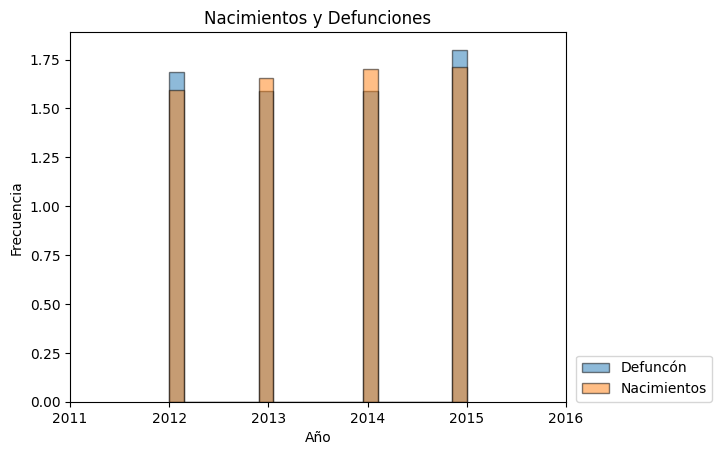

In [ ]:
plt.hist(dfDefunc["anio"], label = "Defuncón", bins=20, edgecolor = "black" , alpha = 0.5, density = True)
plt.hist(dfNac["anio"], label= "Nacimientos", bins=20, edgecolor = "black" , alpha=0.5, density = True)
plt.title("Nacimientos y Defunciones")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.xlim(left=2011, right=2016)
plt.legend(loc=(1.02, 0));

En este gráfico se puede observar la distribución de Nacimientos y Defunciones fetales. Se puede observar que la tasa de nacimientos tiende al aumento 

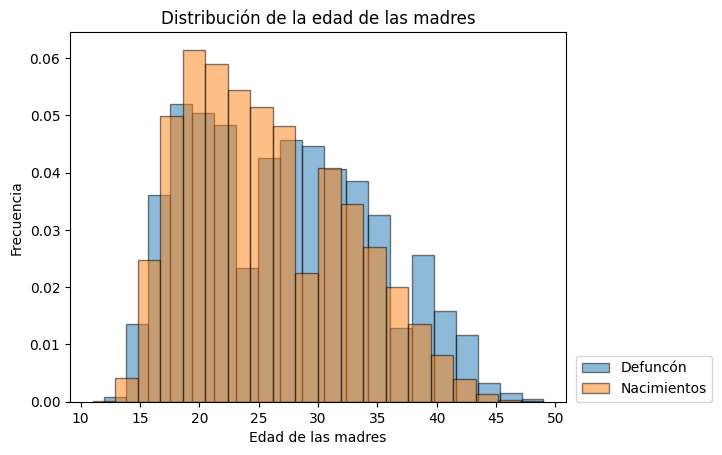

In [ ]:
plt.hist(dfDefunc["edad_mad"], label = "Defuncón", bins=20, edgecolor = "black" , alpha = 0.5, density = True)
plt.hist(dfNac["edad_mad"], label= "Nacimientos", bins=20, edgecolor = "black" , alpha=0.5, density = True)
plt.title("Distribución de la edad de las madres")
plt.xlabel("Edad de las madres")
plt.ylabel("Frecuencia")
#plt.xlim(left=2011, right=2016)
plt.legend(loc=(1.02, 0));

Se puede observar que las edades de las madres de niños nacidos tienen su mayor frecuencia entre 18 y 28 años de edad aproximadamente. Algo muy interesante es que la distribución de edades de las madres de niños nacidos y niños fallecidos son muy parecidos, sin embargo hay una diferencia muy marcada en la distribución de las defunciones, se puede ver que hay pocos registros de defunciones cerca a los 25 años de edad. Se podría decir que es la edad en la que menos defunciones fetales se registan.

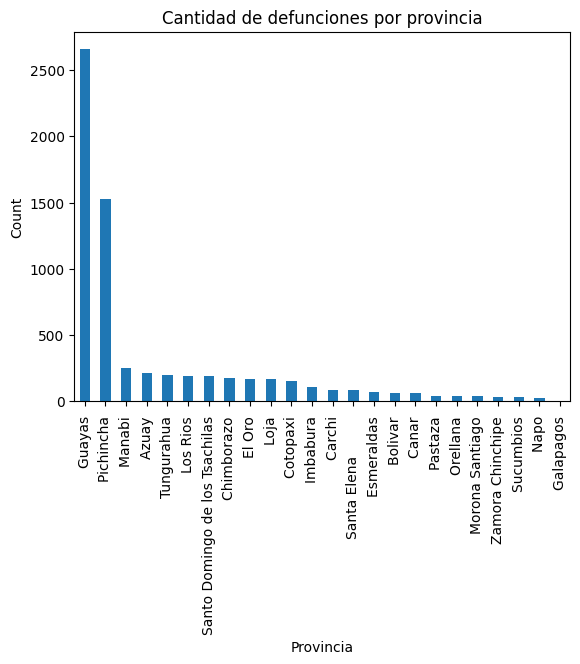

In [ ]:
dfDefunc["provincia"].value_counts().plot(kind="bar")
plt.xlabel("Provincia")
plt.title("Cantidad de defunciones por provincia")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

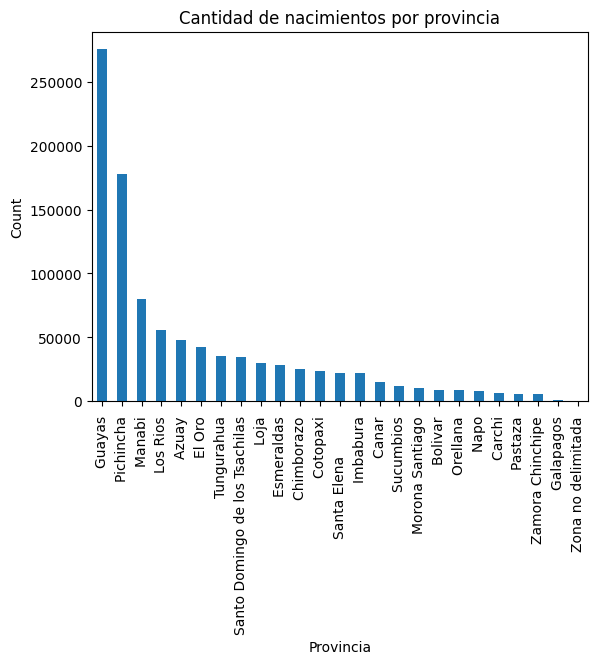

In [ ]:
dfNac["provincia"].value_counts().plot(kind="bar")
plt.xlabel("Provincia")
plt.title("Cantidad de nacimientos por provincia")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

Se puede observar que Pichincha y Guayas registran la mayor cantidad de defunciones y nacimientos. Las provincias con menor defunción se registran en la región oriental Napo Sucumbíos y Galápagos

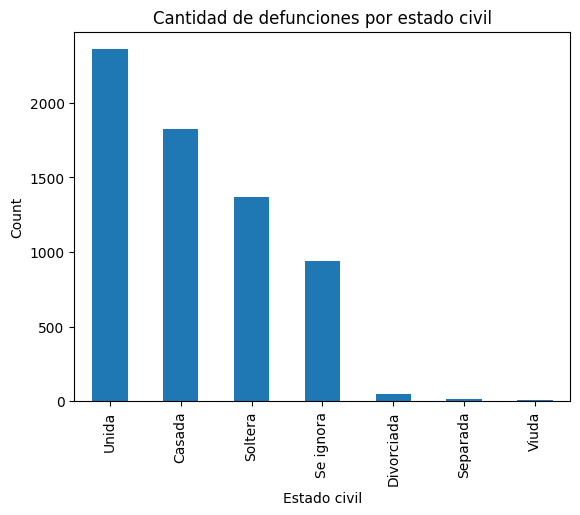

In [ ]:
dfDefunc["est_civil"].value_counts().plot(kind="bar")
plt.xlabel("Estado civil")
plt.title("Cantidad de defunciones por estado civil")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

La mayor cantidad de registros de defunción lo tienen las personas unidas.

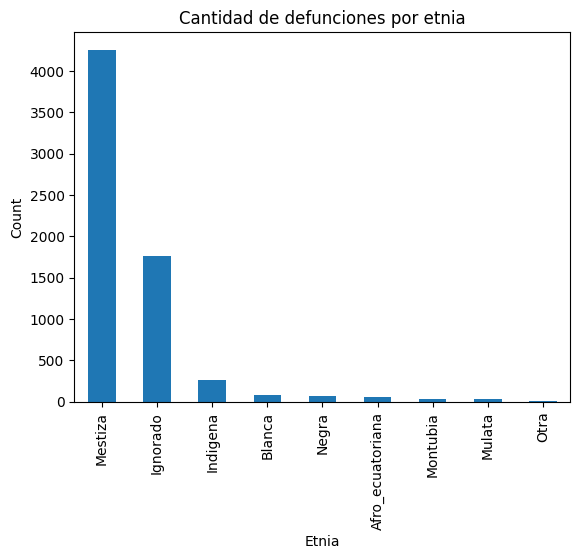

In [ ]:
dfDefunc["etnia"].value_counts().plot(kind="bar")
plt.xlabel("Etnia")
plt.title("Cantidad de defunciones por etnia")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

Es razonable encontrar una gran cantidad de defunciones de la etnia mestiza, ya que son mayoría en el país

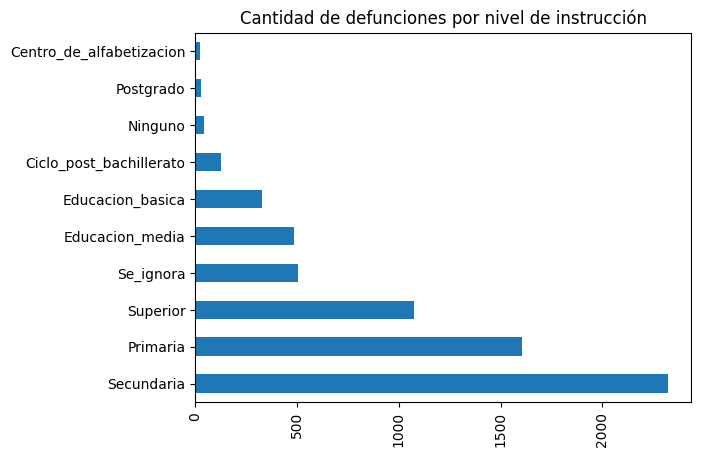

In [ ]:
dfDefunc["niv_inst"].value_counts().plot(kind="barh")
plt.title("Cantidad de defunciones por nivel de instrucción")
plt.xticks(rotation=90)
plt.show()

Se puede observar que hay una mayoría de madres con instrucción secundaria y primaria que han perdido un bebé.

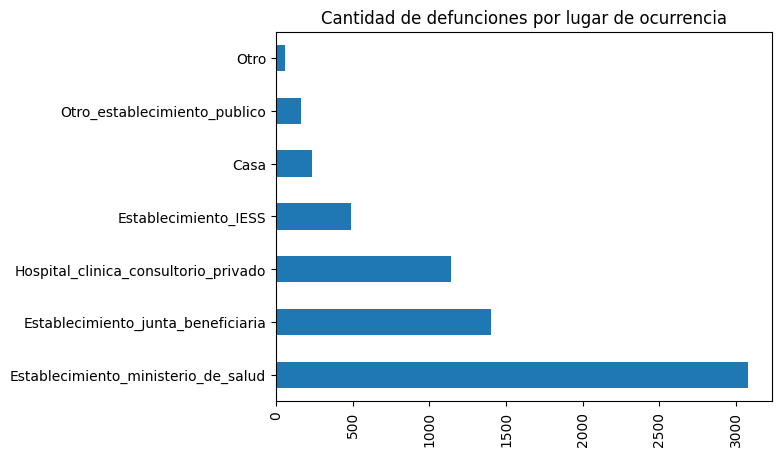

In [ ]:
dfDefunc["lugar_ocur"].value_counts().plot(kind="barh")
plt.title("Cantidad de defunciones por lugar de ocurrencia")
plt.xticks(rotation=90)
plt.show()

Se puede ver que lamayoría de defunciones se ha dado en algún establecimiento del ministerio de salud.

In [ ]:
df.head()

,sexo,sem_gest,anio,mes,asis_por,p_emb,lugar_ocur,provincia,canton,parroquia,area,edad_mad,nac_mad,con_pren,hij_viv,hij_vivm,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res,Estado
27,Mujer,39.0,2012.0,Enero,Medico,Simple,Establecimiento_IESS,Azuay,Cuenca,Cuenca,Urbana,33.0,Ecuatoriana,9.0,1.0,0.0,0.0,Mestiza,Soltera,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
75,Hombre,40.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,25.0,Ecuatoriana,9.0,1.0,0.0,0.0,Mestiza,Casada,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
118,Hombre,39.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,32.0,Ecuatoriana,9.0,2.0,0.0,0.0,Mestiza,Casada,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
119,Mujer,41.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,26.0,Ecuatoriana,9.0,1.0,0.0,0.0,Mestiza,Se ignora,Si,Superior,Azuay,Cuenca,Cuenca,Urbana,1
136,Hombre,38.0,2012.0,Enero,Medico,Simple,Hospital_clinica_consultorio_privado,Azuay,Cuenca,Cuenca,Urbana,33.0,Ecuatoriana,9.0,3.0,0.0,0.0,Mestiza,Casada,Si,Superior,Canar,Azoques,Azogues,Urbana,1


Text(0, 0.5, 'Número de controles prenatal')

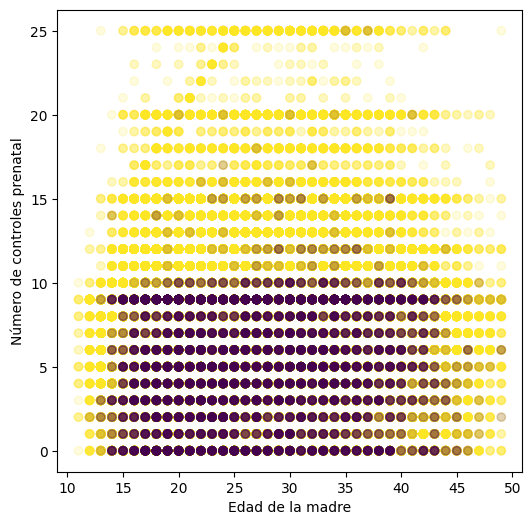

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.scatter(df['edad_mad'], df['con_pren'], c = df['Estado'], alpha=0.15)
axes.set_xlabel('Edad de la madre')
axes.set_ylabel('Número de controles prenatal')

Se puede ver el número de control prenatal de las madres, se puede ver que hay pocos controles prenatales en los casos de defunción.

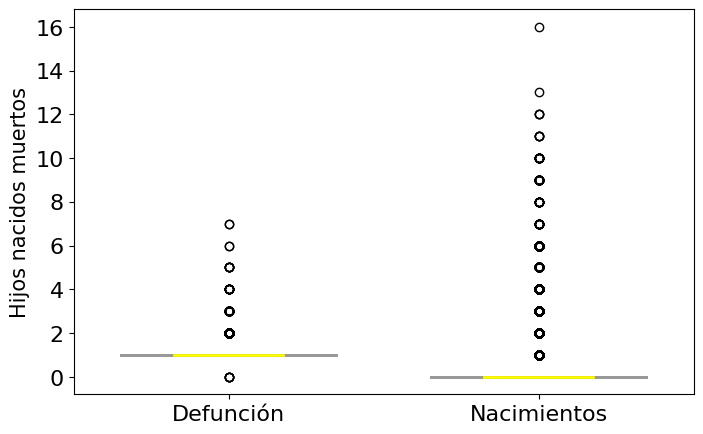

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dfDefunc["hij_nacm"],dfNac["hij_nacm"]],
           notch = True,
           labels=['Defunción', 'Nacimientos'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
#plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('Hijos nacidos muertos', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

Se puede ver que hay antecedentes de hijos nacidos muertos en las madres que registraron casos de defunción.

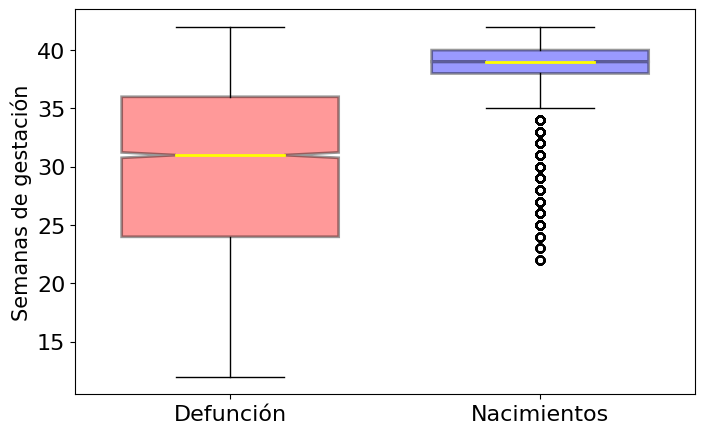

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dfDefunc["sem_gest"],dfNac["sem_gest"]],
           notch = True,
           labels=['Defunción', 'Nacimientos'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
#plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('Semanas de gestación', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

Aquí se puede ver los nacimientos se registran al rededor de 40 semanas de gestación lo cual es bastante obvio. En el caso de las defunciones hay un rango bastante grande de semanas de gestación. 

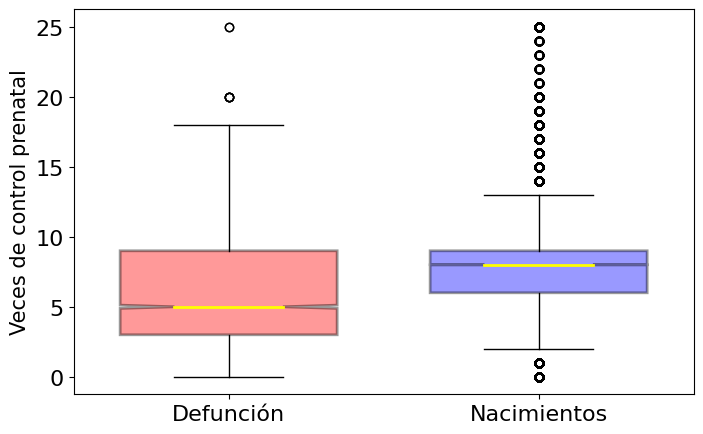

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dfDefunc["con_pren"],dfNac["con_pren"]],
           notch = True,
           labels=['Defunción', 'Nacimientos'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
#plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('Veces de control prenatal', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

Se puede observar que en general en el caso de las defunciones se ve que las madres acuden a los centros médicos para un control menos veces que en el caso de los nacimientos, y de hecho se puede ver que en primer quintil de ambos grupos tiene una gran diferencia.

<ipython-input-151-b06faf8c6b61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

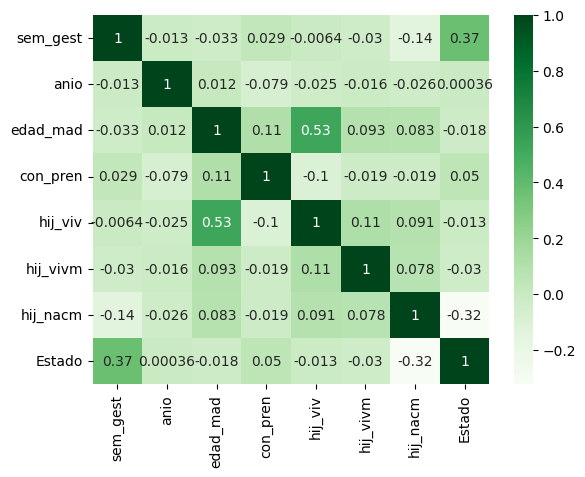

In [ ]:
#mapa de calor
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

Dentro de los parámetros de correlación podemos ver que las semanas de gestación están muy correlacionadas con elnacimiento del niño, lo cual es muy obvio. También hay una buena correlación entre las variables de edad de la madre y la cantidad de hijos vivos, lo cual es bastante obvio también. Hay una correlación negativa entre la cantidad de hijos nacidos muertos y el estado, lo cual es razonable, al parecer la muerte de un recien nacido también puede deverse a un antescedente de la cantidad de hijos nacidos muertos de la madre. 